### 0. 데이터 준비

In [1]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [3]:
df.shape

(202772, 12)

In [4]:
df_age = df[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 7)

In [5]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_63808/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [6]:
df_v1 = df_age[df_age['품목대분류'] == '연료 및 전지']
df_v1['품목대분류'].unique()

array(['연료 및 전지'], dtype=object)

In [7]:
df_v1.shape #주방기기 및 용품 5552건

(890, 7)

In [8]:
df_v1 = df_v1[['성별', '범주형 나이', '위해원인', '위해증상', '위해부위', '발생장소']]
df_v1.head()

,성별,범주형 나이,위해원인,위해증상,위해부위,발생장소
13279,남자,35-39,가스누설 및 가스폭발,"중독(약물, 가스, 화학물질 등)","(부위)신체내부-호흡계통(기도, 폐 등)",기타 - 시설목적공간
13280,남자,40-44,가스누설 및 가스폭발,"중독(약물, 가스, 화학물질 등)",(부위)전신 손상,"기타 - 상세불명의 장소, 부대·부속시설"
13281,남자,0-4,고온물질,화상-열에 의한,(부위)손가락,주택 - 거실
13282,남자,30-34,가스누설 및 가스폭발,화상-열에 의한,(부위)귀 및 고막,"기타 - 상세불명의 장소, 부대·부속시설"
13283,남자,85-89,화재,화상-열에 의한,"(부위)다리(무릎 아래, 무릎 및 발목 제외)",주택 - 거실


## 1. 빈발항목 분석

In [9]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df_encoded.shape

(890, 149)

In [11]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                           534
여자                           351
0-4                          314
이물질(기타)                      290
체내 위험 이물질                    287
화상-열에 의한                     267
(부위)신체내부-소화계통(식도,위장,대장 등)    255
가스누설 및 가스폭발                  223
주택 - 침실/방                    201
주택 - 거실                      188
dtype: int64

In [12]:
sort_sum = pd.DataFrame(df_encoded.sum().sort_values(ascending=False)).iloc[:14].T

sort_sum = sort_sum.astype(float)

new_row = {}
for column in sort_sum.columns:
    new_row[column] = sort_sum.iloc[0][column] / df_v1.shape[0]

pd.concat([sort_sum, pd.DataFrame(new_row, index=[0])], ignore_index=True)

,남자,여자,0-4,이물질(기타),체내 위험 이물질,화상-열에 의한,"(부위)신체내부-소화계통(식도,위장,대장 등)",가스누설 및 가스폭발,주택 - 침실/방,주택 - 거실,"기타 - 상세불명의 장소, 부대·부속시설","중독(약물, 가스, 화학물질 등)",기타 - 시설목적공간,(부위)손
0,534.0,351.000000,314.000000,290.000000,287.000000,267.0,255.000000,223.000000,201.000000,188.000000,178.0,91.000000,90.000000,89.0
1,0.6,0.394382,0.352809,0.325843,0.322472,0.3,0.286517,0.250562,0.225843,0.211236,0.2,0.102247,0.101124,0.1


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkjayoung/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/Users/parkjayo

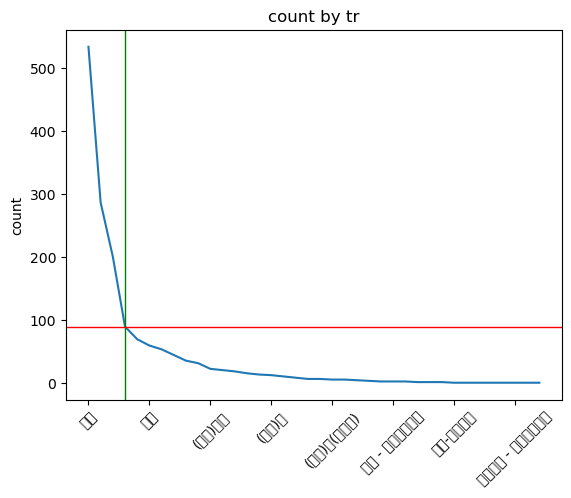

In [13]:
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)
#plt.ylim(0,30000)
#plt.xlim(0,100)

plt.axvline(x=3., color='g', linewidth=1)
plt.axhline(y=89, color='r', linewidth=1)

plt.show()
# (5552, 176)
# 10%(14.9/149)의 항목(14항목(내림처리)) 10% 발생 

In [14]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.head()

,support,itemsets
0,0.600000,(남자)
1,0.250562,(가스누설 및 가스폭발)
2,0.102247,"(중독(약물, 가스, 화학물질 등))"
3,0.101124,(기타 - 시설목적공간)
4,0.200000,"(기타 - 상세불명의 장소, 부대·부속시설 )"


In [15]:
frequent_itemsets.sort_values(by='support', ascending=False).head(35)

,support,itemsets
0,0.600000,(남자)
9,0.394382,(여자)
5,0.352809,(0-4)
13,0.325843,(이물질(기타))
12,0.322472,(체내 위험 이물질)
66,0.314607,"(이물질(기타), 체내 위험 이물질)"
6,0.300000,(화상-열에 의한)
11,0.286517,"((부위)신체내부-소화계통(식도,위장,대장 등))"
44,0.278652,"(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))"
76,0.275281,"(0-4, 이물질(기타))"


#### [주요 빈발 집합 분석] 
- 여자: 39.4% 남자: 60%. 남성 집단에서 더욱 많은 사고 발생.

(예측 가능)
- 화상 0.3


(주의)
- 이물질 0.33 , 체내 위험 이물질 0.32
- 이물질, 체내 위험에 대한 문제가 많음.
- 화학 연료를 많이 사용하는 연료 전지 품목들이어서 그런지, 섭취하는 음식이 아님에도 불구하고 신체 내부에 관한 위해 내용들이 많음. 호흡기를 통한 것으로 예측됨. 그럼에도 호흡계 질병이 아닌 식도, 위장 등의 소화계 질병이 많음.


(예측 불가능)
- 0-4세의 사건 발생빈도도 많고, 빈발 비율도 높음. 
- 해당 연령층이 연료 전지와 관련이 없어보이는데 더욱 자세한 분석이 필요할 것 같음. (연료전지의 하위 품목은 건전지, 배터리 등)


(2개 이상 항목)
- (주택 - 주방, 열상(찢어짐)) : 지지도 0.363112
- 파열 파손 꺾여짐(원인), 열상(찢어짐) (증상) : 지지도 0.389409 > 파열/파손/꺾임으로 인한 찢어짐의 사고가 많이 발생한다.
- 대부분 [원인] 파열 파손 꺾여짐, 예리함 마감처리 불량과 [부위] 손가락, [장소] 주택-주방, [증상] 열상(찢어짐)을 중심으로 높은 지지도가 나타남. 주방기기의 특징을 고려했을 때 수용 가능한 결과임.

In [16]:
# freq_its= 2 생성
# itemsets의 항목개수를 갖는 length 컬럼 추가

frequent_itemsets['length'] = (
    frequent_itemsets['itemsets'].apply(lambda x : len(x))
)

frequent_itemsets.head()

,support,itemsets,length
0,0.600000,(남자),1
1,0.250562,(가스누설 및 가스폭발),1
2,0.102247,"(중독(약물, 가스, 화학물질 등))",1
3,0.101124,(기타 - 시설목적공간),1
4,0.200000,"(기타 - 상세불명의 장소, 부대·부속시설 )",1


In [17]:
# 단일항목이 아닌 2건 이상의 항목을 갖는 항목집합을 추출
freq_its_2 = frequent_itemsets[frequent_itemsets.length >= 2 ]
freq_its_2.head()

,support,itemsets,length
14,0.147191,"(남자, 가스누설 및 가스폭발)",2
15,0.128090,"(화상-열에 의한, 가스누설 및 가스폭발)",2
16,0.103371,"(여자, 가스누설 및 가스폭발)",2
17,0.130337,"(남자, 기타 - 상세불명의 장소, 부대·부속시설 )",2
18,0.202247,"(0-4, 남자)",2


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

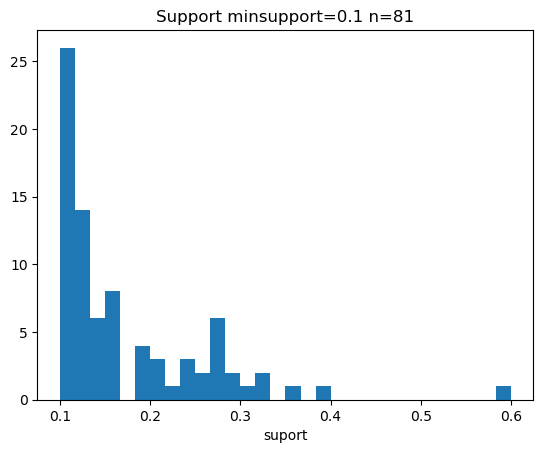

In [18]:
# 2건 이상 항목집합의 지지도 분포 (히스토그램)
frequent_itemsets.hist('support', grid=False, bins=30)
plt.title(f'Support minsupport={min_support} n={frequent_itemsets.shape[0]}')
plt.xlabel('suport')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

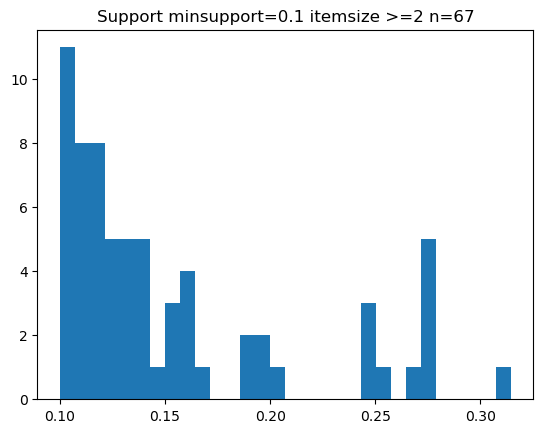

In [19]:
frequent_itemsets['length'] = frequent_itemsets.itemsets.apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets.length >=2].support.hist(grid=False, bins=30)
plt.title(f'Support minsupport={min_support} itemsize >=2 n={frequent_itemsets.length.ge(2).sum()}')
plt.show();

In [20]:
freq_its_2[freq_its_2.support >= 0.20].sort_values(by='support', ascending=False)

,support,itemsets,length
66,0.314607,"(이물질(기타), 체내 위험 이물질)",2
44,0.278652,"(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",2
45,0.275281,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",2
76,0.275281,"(0-4, 이물질(기타))",2
67,0.273034,"(0-4, 체내 위험 이물질)",2
57,0.271910,"(이물질(기타), 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",3
72,0.270787,"(0-4, 이물질(기타), 체내 위험 이물질)",3
42,0.251685,"(0-4, (부위)신체내부-소화계통(식도,위장,대장 등))",2
47,0.248315,"(0-4, 이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",3
48,0.246067,"(0-4, 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",3


#### 앞서 예측 불가능하다고 판단했던 요소들이 규칙에서 모두 추출되었으므로 따로 낮은 경우의 지지도 항목들을 분석하지 않음

----

## 2. 연관규칙 분석

In [21]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
54,"(이물질(기타), 주택 - 침실/방 )",(체내 위험 이물질),0.102247,0.322472,0.102247,1.000000,3.101045,0.069275,inf,0.754693
212,"(0-4, 남자, 체내 위험 이물질)",(이물질(기타)),0.156180,0.325843,0.155056,0.992806,3.046887,0.104166,93.707865,0.796137
123,"(0-4, 남자, 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(이물질(기타)),0.139326,0.325843,0.138202,0.991935,3.044216,0.092804,83.595506,0.780212
221,"(0-4, 체내 위험 이물질)",(이물질(기타)),0.273034,0.325843,0.270787,0.991770,3.043707,0.181820,81.910112,0.923637
77,"(0-4, 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(이물질(기타)),0.246067,0.325843,0.243820,0.990868,3.040938,0.163641,73.820225,0.890204
...,...,...,...,...,...,...,...,...,...,...
119,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))","(0-4, 남자)",0.275281,0.202247,0.139326,0.506122,2.502494,0.083651,1.615285,0.828457
109,"(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))","(0-4, 남자)",0.278652,0.202247,0.140449,0.504032,2.492159,0.084093,1.608477,0.830031
135,"(0-4, 이물질(기타))","(남자, 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",0.275281,0.159551,0.138202,0.502041,3.146594,0.094281,1.687788,0.941325
142,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))","(0-4, 남자, 이물질(기타))",0.275281,0.157303,0.138202,0.502041,3.191545,0.094900,1.692301,0.947501


----

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

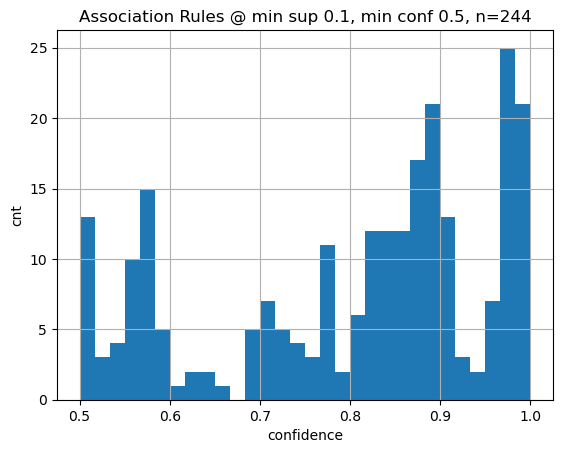

In [22]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

- 최소 지지도: 0.1 / 최소 신뢰도: 0.5 / 연관규칙수는 69개

- 신뢰도 전반적으로 넓게 존재

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

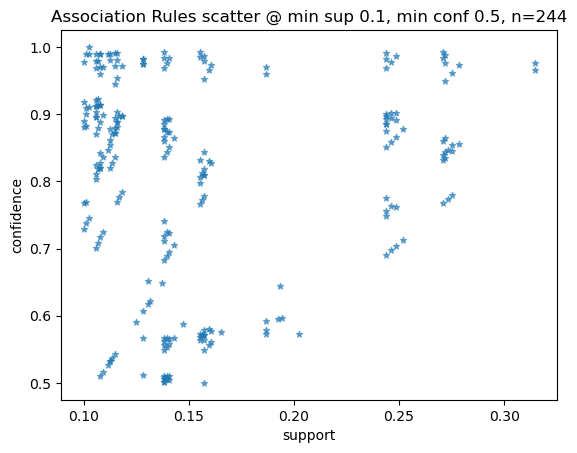

In [23]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

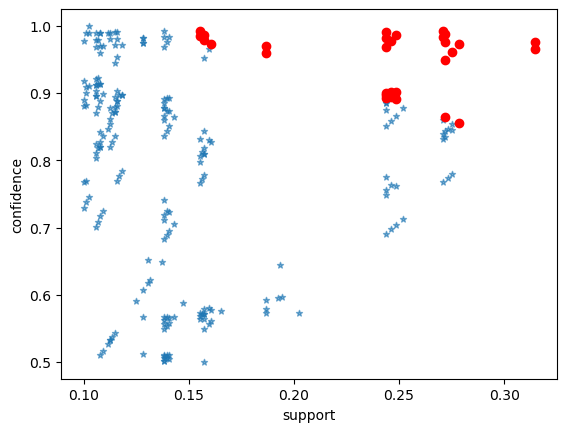

In [24]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(30, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
#plt.title('Association Rules scatter @ min sup 0.02, min conf 0.5, n=826')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [25]:
top_40_rules = rules_conf.nlargest(40, 'combined_value')
top_40_filter = top_40_rules[top_40_rules['conviction']<=15]
print(top_40_filter.shape)
top_40_filter

(16, 11)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
159,"((부위)신체내부-소화계통(식도,위장,대장 등))","(이물질(기타), 체내 위험 이물질)",0.286517,0.314607,0.271910,0.949020,3.016527,0.181770,13.444252,0.936943,1.220930
63,"(0-4, 이물질(기타))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.275281,0.286517,0.248315,0.902041,3.148299,0.169442,7.283474,0.941562,1.150355
69,"(0-4, 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.273034,0.286517,0.246067,0.901235,3.145485,0.167839,7.224017,0.938261,1.147302
75,"(0-4, 이물질(기타), 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.270787,0.286517,0.243820,0.900415,3.142625,0.166235,7.164560,0.934973,1.144235
78,"(이물질(기타), 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.271910,0.352809,0.243820,0.896694,2.541586,0.147888,6.264809,0.833063,1.140514
71,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.275281,0.352809,0.246067,0.893878,2.533602,0.148946,6.098531,0.835227,1.139945
65,"(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.278652,0.352809,0.248315,0.891129,2.525812,0.150004,5.944569,0.837442,1.139444
80,"(0-4, 체내 위험 이물질)","(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",0.273034,0.278652,0.243820,0.893004,3.204733,0.167739,6.741832,0.946346,1.136824
154,"(이물질(기타), 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.314607,0.286517,0.271910,0.864286,3.016527,0.181770,5.257244,0.975342,1.136196
59,(이물질(기타)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.325843,0.286517,0.278652,0.855172,2.984719,0.185292,4.926431,0.986358,1.133824


In [26]:
indices_to_drop = []
top_10_rules= top_40_filter.drop(indices_to_drop).reset_index(drop=True).head(10)
top_10_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,"((부위)신체내부-소화계통(식도,위장,대장 등))","(이물질(기타), 체내 위험 이물질)",0.286517,0.314607,0.271910,0.949020,3.016527,0.181770,13.444252,0.936943,1.220930
1,"(0-4, 이물질(기타))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.275281,0.286517,0.248315,0.902041,3.148299,0.169442,7.283474,0.941562,1.150355
2,"(0-4, 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.273034,0.286517,0.246067,0.901235,3.145485,0.167839,7.224017,0.938261,1.147302
3,"(0-4, 이물질(기타), 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.270787,0.286517,0.243820,0.900415,3.142625,0.166235,7.164560,0.934973,1.144235
4,"(이물질(기타), 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.271910,0.352809,0.243820,0.896694,2.541586,0.147888,6.264809,0.833063,1.140514
5,"(체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.275281,0.352809,0.246067,0.893878,2.533602,0.148946,6.098531,0.835227,1.139945
6,"(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.278652,0.352809,0.248315,0.891129,2.525812,0.150004,5.944569,0.837442,1.139444
7,"(0-4, 체내 위험 이물질)","(이물질(기타), (부위)신체내부-소화계통(식도,위장,대장 등))",0.273034,0.278652,0.243820,0.893004,3.204733,0.167739,6.741832,0.946346,1.136824
8,"(이물질(기타), 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.314607,0.286517,0.271910,0.864286,3.016527,0.181770,5.257244,0.975342,1.136196
9,(이물질(기타)),"((부위)신체내부-소화계통(식도,위장,대장 등))",0.325843,0.286517,0.278652,0.855172,2.984719,0.185292,4.926431,0.986358,1.133824


In [27]:
top_10_rules = top_10_rules.sort_values(by='confidence', ascending=False)
top_10_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,"((부위)신체내부-소화계통(식도,위장,대장 등))","(이물질(기타), 체내 위험 이물질)",0.286517,0.314607,0.271910,0.949020,3.016527,0.181770,13.444252,0.936943,1.220930
1,"(0-4, 이물질(기타))","((부위)신체내부-소화계통(식도,위장,대장 등))",0.275281,0.286517,0.248315,0.902041,3.148299,0.169442,7.283474,0.941562,1.150355
2,"(0-4, 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.273034,0.286517,0.246067,0.901235,3.145485,0.167839,7.224017,0.938261,1.147302
3,"(0-4, 이물질(기타), 체내 위험 이물질)","((부위)신체내부-소화계통(식도,위장,대장 등))",0.270787,0.286517,0.243820,0.900415,3.142625,0.166235,7.164560,0.934973,1.144235
4,"(이물질(기타), 체내 위험 이물질, (부위)신체내부-소화계통(식도,위장,대장 등))",(0-4),0.271910,0.352809,0.243820,0.896694,2.541586,0.147888,6.264809,0.833063,1.140514


#### [분석 1] 
(주의) ((부위)신체내부-소화계통(식도,위장,대장 등))	(이물질(기타), 체내 위험 이물질)	
- 선행항목 : 신체내부 - 소화계통

- 후행항목 : 이물질(기타), 체내 위험 이물질

- 0.271910	0.949020	3.016527	0.181770	13.444252	
- -> 지지도 0.27 소화 계통의 위해 사례이면서 이물질으로 인한 사례일 확률.
- -> 신뢰도 0.95 소화 계통 사고시 이물질 관련 위해 사례일 확률. 필연적인 당연한 결과임. 그러나 후행항목이 신체 내부 소화 계통 사고인 경우도 다수 존재함. 이물질 사고일 경우 호흡기 사고가 아닌 신체 내부 소화계통 사고라는 것은 의의가 있음.

- -> 향상도 3.02 으로 함께 나타날 확률이 더 높음. 이는 소화계통, 이물질 관련 값들이 함께 순환적으로 계속해서 나타났기 때문임,

- -> 확신 13.44 실제적인 연관성을 가진 것으로 간주되기는 함.
 
#### [ 종합 ]
- 이물질과 소화계통을 중심으로 반복적으로 의미없는 규칙들이 다수 도출됨. 예를들어 소화계통 사고라면, 이물질 사고. 이물질 사고라면, 소화계통 사고. 이런식으로 순환구조를 보임. > 너무 높은 확신을 가진 규칙들은 제외하고 최종 규칙을 도출함. 그럼에도 이러한 항목들을 위주로 규칙이 구성됨.
- 따라서 (부위)신체내부-소화계통(식도,위장,대장 등), 체내 위험 이물질, 이물질(기타) 이러한 요소들이 연료 전지에서 주로 주의해야할 요소들로 보임.
- 특히 연료 전지를 사용하지 않는 0-4의 연령대가 많이 나타남. 주의해서 추가로 마지막에 분석해보겠다.

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

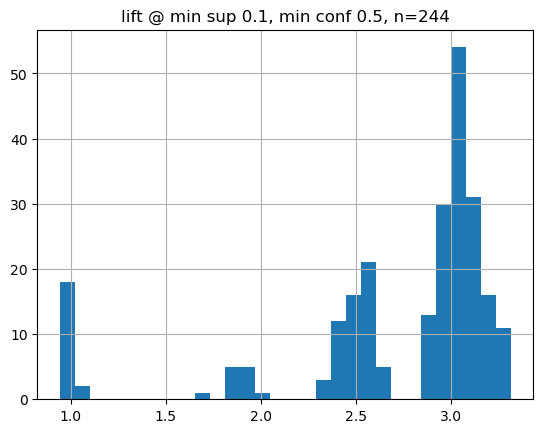

In [28]:
# 향상도 관찰
# 연관규칙의 향상도 분포
rules_conf.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

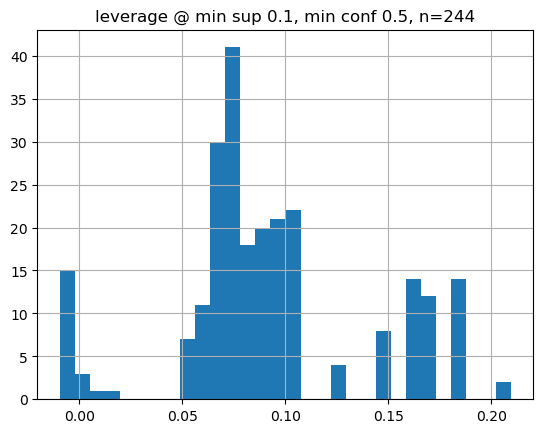

In [29]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
rules_conf.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [30]:
# 확신 관찰
# 연관규칙의 확신 분포
#rules_conf.hist('conviction', bins = 30)
#plt.title(f'convicition {txt}')
#plt.show()  #inf 값 없음!!

In [31]:
filtered_rules = rules_conf[
    ((rules_conf['antecedents'].apply(lambda x: any(i in x for i in ['0-4']))) |
     (rules_conf['consequents'].apply(lambda x: any(i in x for i in ['0-4']))))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
3,(0-4),(남자),0.352809,0.600000,0.202247,0.573248,0.955414,-0.009438,0.937313,-0.067257,0.775496
5,(주택 - 거실 ),(0-4),0.211236,0.352809,0.137079,0.648936,1.839341,0.062553,1.843514,0.578534,0.786015
10,"(0-4, 주택 - 거실 )",(이물질(기타)),0.137079,0.325843,0.114607,0.836066,2.565856,0.069941,4.112360,0.707210,0.950672
11,"(이물질(기타), 주택 - 거실 )",(0-4),0.131461,0.352809,0.114607,0.871795,2.471011,0.068226,5.048090,0.685412,0.986402
12,(주택 - 거실 ),"(0-4, 이물질(기타))",0.211236,0.275281,0.114607,0.542553,1.970908,0.056458,1.584270,0.624546,0.657160
...,...,...,...,...,...,...,...,...,...,...,...
239,"(0-4, 여자)",(이물질(기타)),0.150562,0.325843,0.117978,0.783582,2.404786,0.068918,3.115072,0.687705,0.901560
240,"(이물질(기타), 여자)",(0-4),0.131461,0.352809,0.117978,0.897436,2.543688,0.071597,6.310112,0.698725,1.015413
241,"(0-4, 남자)",(이물질(기타)),0.202247,0.325843,0.157303,0.777778,2.386973,0.091403,3.033708,0.728370,0.935081
242,"(0-4, 이물질(기타))",(남자),0.275281,0.600000,0.157303,0.571429,0.952381,-0.007865,0.933333,-0.064540,0.728732


In [32]:
bouns = df[(df['범주형 나이'] == '0-4')&(df['품목대분류']=='연료 및 전지')&(df['품목중분류']!='가정용 난방·환기용품')]
bouns['품목'].value_counts()

품목
수은산화전지               106
건전지                   86
리튬전지                  45
기타 배터리, 전지 및 액세서리     12
휴대폰 배터리 및 충전기         11
충전기                    5
목탄(숯)                  3
부탄가스                   2
등유                     1
전지 어댑터 또는 액세서리         1
연탄                     1
알카라인배터리                1
Name: count, dtype: int64

In [33]:
bouns[bouns['품목']=='건전지']

,성별,범주형 나이,연령대분류,범주형 발생일,요일,위해원인,위해증상,위해부위,발생장소,품목대분류,품목중분류,품목
38341,여자,0-4,유아,20201201-10,화요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)","기타 - 상세불명의 장소, 부대·부속시설",연료 및 전지,"배터리, 전지 및 액세서리",건전지
38342,남자,0-4,유아,20201201-10,수요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 침실/방,연료 및 전지,"배터리, 전지 및 액세서리",건전지
38343,여자,0-4,유아,20200821-31,일요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 침실/방,연료 및 전지,"배터리, 전지 및 액세서리",건전지
38344,남자,0-4,유아,20201121-30,화요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 침실/방,연료 및 전지,"배터리, 전지 및 액세서리",건전지
38345,여자,0-4,유아,20200821-31,수요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,연료 및 전지,"배터리, 전지 및 액세서리",건전지
...,...,...,...,...,...,...,...,...,...,...,...,...
201293,남자,0-4,유아,20231201-10,일요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,연료 및 전지,"배터리, 전지 및 액세서리",건전지
201378,여자,0-4,유아,20231201-10,화요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,연료 및 전지,"배터리, 전지 및 액세서리",건전지
201687,남자,0-4,유아,20231201-10,금요일,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,연료 및 전지,"배터리, 전지 및 액세서리",건전지
202016,여자,0-4,유아,20231121-30,화요일,이물질(기타),체내 위험 이물질,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,연료 및 전지,"배터리, 전지 및 액세서리",건전지


#### [ 분석 ]
- 0-4세 베이비들에게 건전지에서 특히 많은 사고가 일어남. 건전지로 인한 체내 사고가 많음. 아마 건전지류를 삼키거나.. 그런가고가 아닐까 예상됨. 유아를 가진 부모들의 주의가 필요할 것으로 보임

----

In [35]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_10_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html
